In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = df = pd.read_csv(url)


In [6]:
#data cleaning

print(df.head())
print(df.info())
# Check for missing values
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)
# Check data types
print(df.dtypes)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
4       3450.0  female  2007  
5       3650.0    male  2007  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      3

In [8]:
#Exploratory Data Analysis (EDA):

# Display summary statistics of numerical columns
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

# Identify unique values in categorical columns
categorical_columns = ['species', 'island', 'sex']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':")
    print(unique_values)

# Display value counts for categorical columns
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"\nValue counts for '{column}':")
    print(value_counts)

# Calculate ranges of numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
for column in numerical_columns:
    column_range = df[column].max() - df[column].min()
    print(f"\nRange of '{column}': {column_range}")


Summary Statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      333.000000     333.000000         333.000000   333.000000   
mean        43.992793      17.164865         200.966967  4207.057057   
std          5.468668       1.969235          14.015765   805.215802   
min         32.100000      13.100000         172.000000  2700.000000   
25%         39.500000      15.600000         190.000000  3550.000000   
50%         44.500000      17.300000         197.000000  4050.000000   
75%         48.600000      18.700000         213.000000  4775.000000   
max         59.600000      21.500000         231.000000  6300.000000   

              year  
count   333.000000  
mean   2008.042042  
std       0.812944  
min    2007.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2009.000000  

Unique values in 'species':
['Adelie' 'Gentoo' 'Chinstrap']

Unique values in 'island':
['Torgersen' 'Biscoe' 'Dream']

Unique values in 'sex

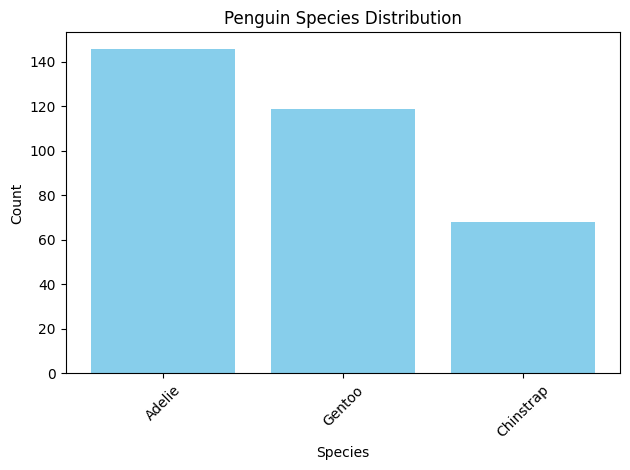

In [17]:
#Visualization Tasks: Species Distribution: Use a bar chart to show the distribution of penguin species.
categories = df['species'].unique()
species_counts = df['species'].value_counts()

plt.figure
plt.bar(categories, species_counts, color='skyblue')

plt.title('Penguin Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

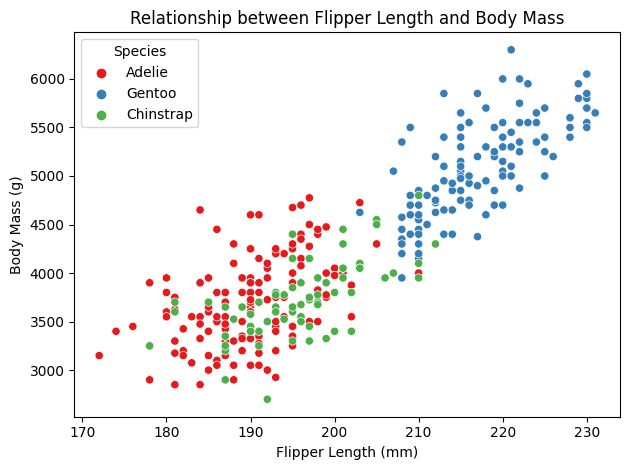

In [19]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', palette='Set1')

plt.title('Relationship between Flipper Length and Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend(title='Species')

plt.tight_layout()
plt.show()

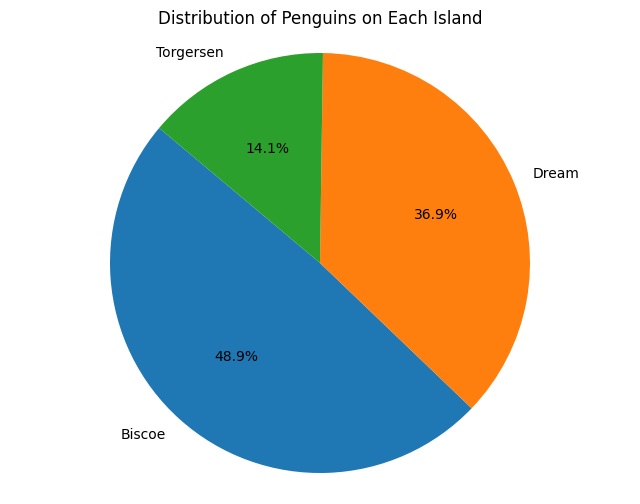

In [27]:
#- Island Distribution: Visualize the count of penguins on each island using a pie chart.

island_counts = df['island'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Penguins on Each Island')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

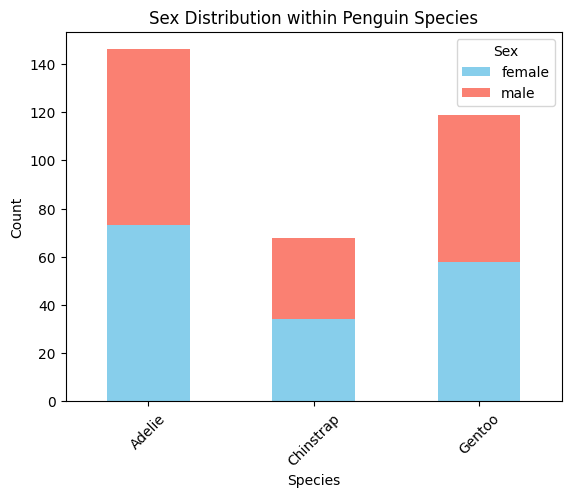

In [39]:
#- Sex Distribution within Species: Create grouped bar charts showing the distribution of sex within each penguin species.

categories = df['sex'].unique()
sex_counts = df['sex'].value_counts()

sex_distribution = df.groupby(['species', 'sex']).size().unstack()



sex_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Sex Distribution within Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

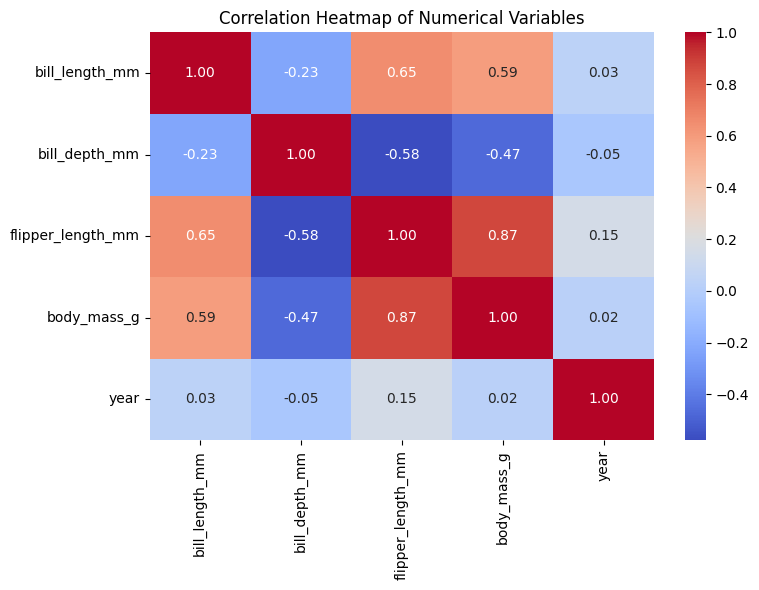

In [30]:
#- Heatmap of Correlations: Plot a heatmap to visualize the correlations between numerical variables.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Creating a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

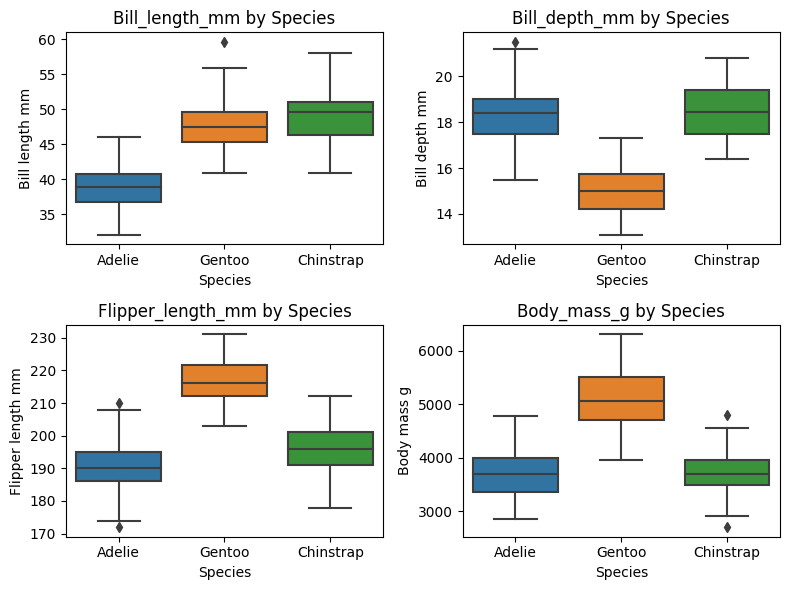

In [33]:
#- Boxplots for Measurements: Generate boxplots for flipper length, body mass, and bill measurements, segmented by species.
# Creating a box plot

columns_for_boxplot = ['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Filter the DataFrame to include only the necessary columns
data_for_boxplot = df[columns_for_boxplot]

# Create boxplots using Seaborn
plt.figure(figsize=(8, 6))
for i, column in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='species', y=column, data=data_for_boxplot)
    plt.title(f'{column.capitalize()} by Species')
    plt.xlabel('Species')
    plt.ylabel(column.replace('_', ' ').capitalize())

#I used chatgpt for this one and im still not sure i understand how it works...
plt.tight_layout()
plt.show()

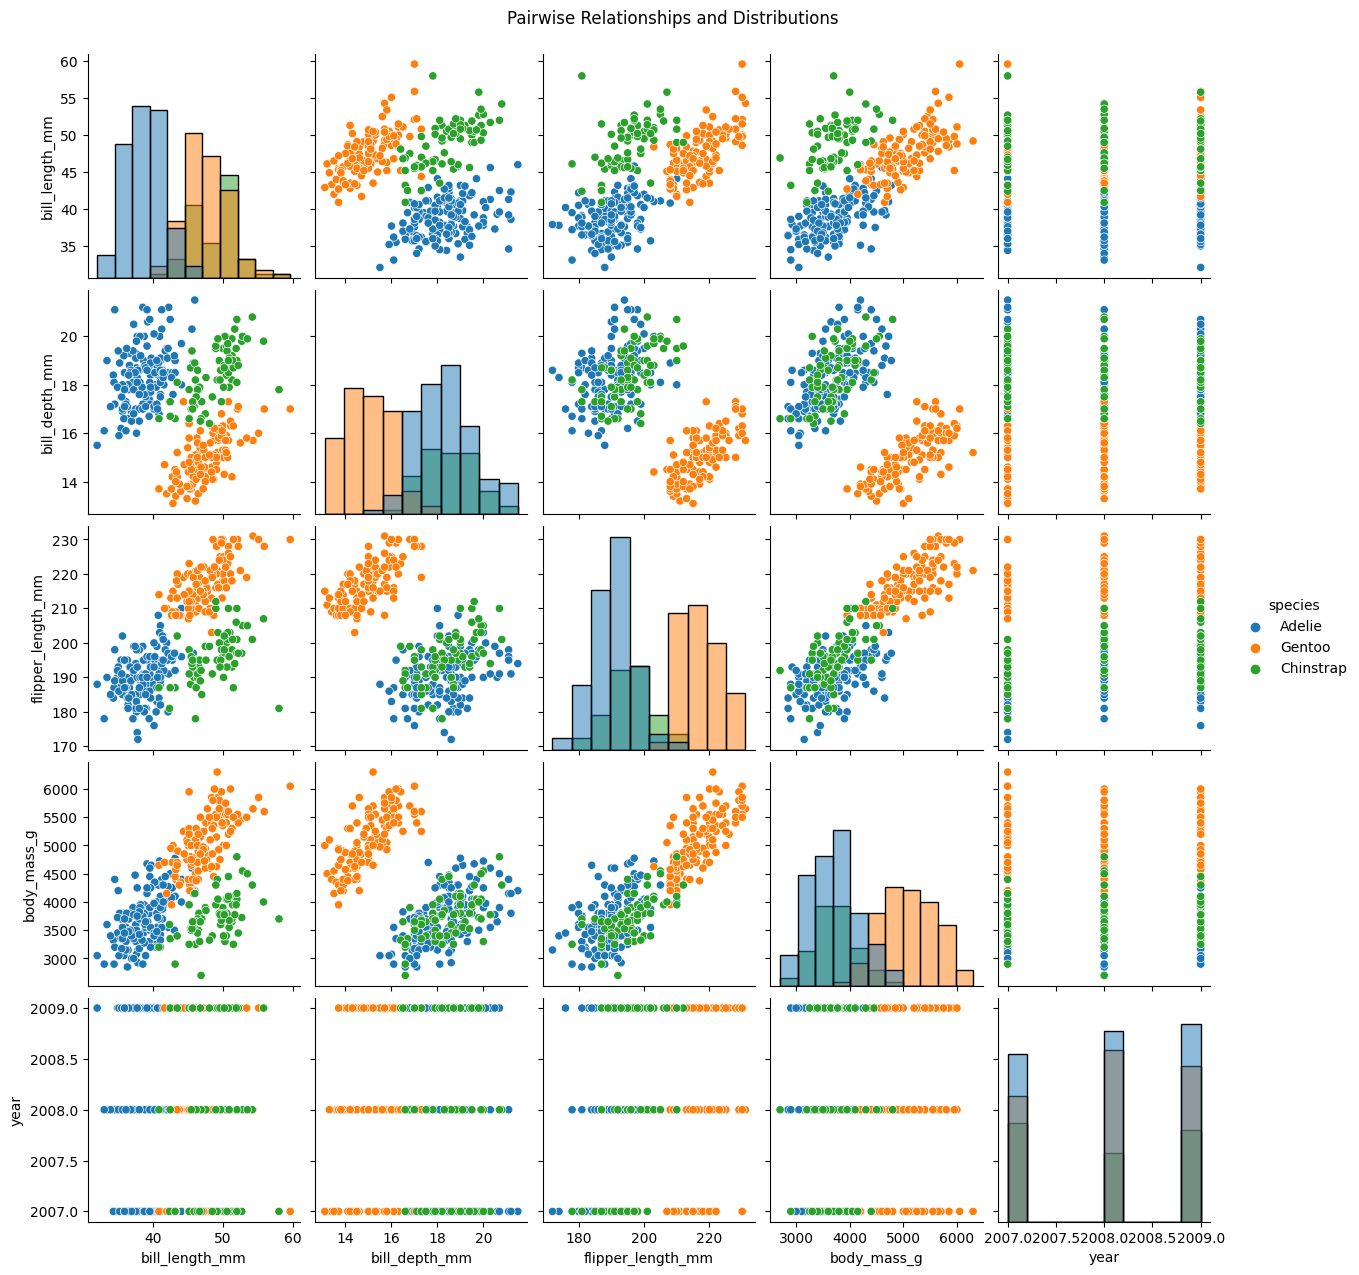

In [37]:
import numpy as np

# Use Seaborn's pairplot to visualize pairwise relationships
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle('Pairwise Relationships and Distributions', y=1.02)
plt.show()

1. Species Distribution: Adelie penguins are slightly more prevalent, followed by Gentoo and Chinstrap species.
2. Flipper Length vs. Body Mass: A positive correlation is evident between flipper length and body mass, with variations across species. Gentoo have a higher body mass and flipper lenght
3. Island Distribution: Biscoe and Palmer islands host more penguins than Torgersen. Biscoe is the predominant Island hosting penguins.
4. Sex Distribution within Species: Male-female ratios are relatively balanced within each penguin species.
5. Correlations: Positive correlations exist between flipper length & body mass, indicating size interdependence among features.
6. Measurements Boxplots: Species exhibit distinct ranges for bill measurements, flipper length, and body mass.
7. Combined Plots: The combined figures offered comprehensive insights into penguin characteristics, revealing relationships and variations across species and measurements.
8. Pairplot Analysis: Highlighted correlations between numerical variables, supporting previous observations.
In summary, the visualizations provided a detailed understanding of penguin species characteristics, distributions, and correlations among measurements, aiding in identifying species-specific traits and relationships within the dataset.